In [1]:
import cv2
import numpy as np
import random 
from matplotlib import pyplot as plt
from brisque import BRISQUE

In [2]:
def imshow(title='Image', image = None,size =5):
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(aspect_ratio*size, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    
def score(image):
    obj = BRISQUE(url = False)
    return obj.score(image)

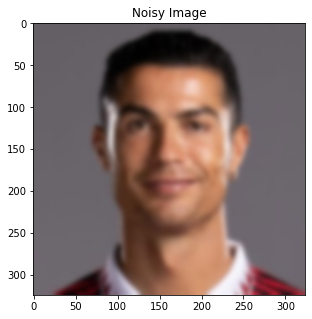

[[[101  95 100]
  [101  95 100]
  [101  95 100]
  ...
  [104  98 103]
  [104  98 103]
  [104  98 103]]

 [[101  95 100]
  [101  95 100]
  [101  95 100]
  ...
  [104  98 103]
  [104  98 103]
  [104  98 103]]

 [[101  95 100]
  [101  95 100]
  [101  95 100]
  ...
  [104  98 103]
  [104  98 103]
  [104  98 103]]

 ...

 [[112 104 111]
  [112 104 111]
  [112 104 111]
  ...
  [ 73  61 137]
  [ 74  62 138]
  [ 74  63 136]]

 [[112 104 111]
  [112 104 111]
  [112 104 111]
  ...
  [ 69  56 140]
  [ 70  57 141]
  [ 70  58 140]]

 [[112 104 111]
  [112 104 111]
  [112 104 111]
  ...
  [ 67  55 143]
  [ 69  55 143]
  [ 70  57 143]]]
Image score of the following image is 85.36874068841254


In [4]:
noisy_image = cv2.imread("C:\\Users\\baksh\\Desktop\\major_project\\images\\gaussinan_blur.jpg")
imshow('Noisy Image', noisy_image)
print(noisy_image)
print("Image score of the following image is", score(noisy_image))

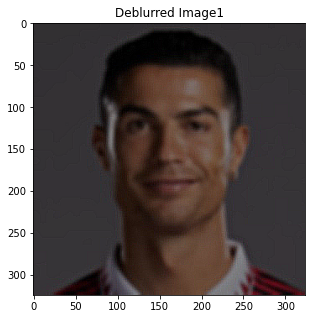

Image score of the following image is 56.4744212766885


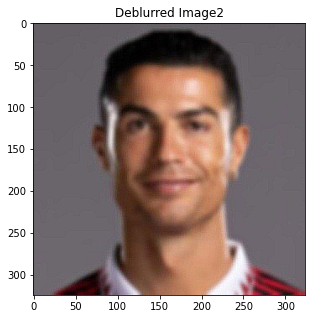

Image score of the following image is 44.59127115179521


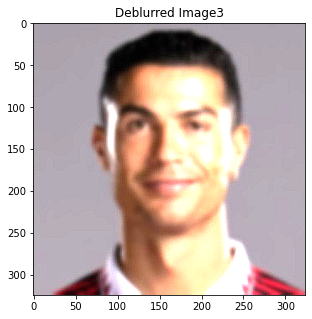

Image score of the following image is 46.66339330058062


In [29]:
# applying the deblurring filter 
image_gray = noisy_image
kernel1 = np.array([[-1,-1,-1],[-1,8.5,-1],[-1,-1,-1]], np.float32)
kernel2 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]], np.float32)
kernel3 = np.array([[-1,-1,-1],[-1,9.7,-1],[-1,-1,-1]], np.float32)
image_filtered1 = cv2.filter2D(image_gray,-1, kernel1)
image_filtered2 = cv2.filter2D(image_gray,-1, kernel2)
image_filtered3 = cv2.filter2D(image_gray,-1, kernel3)
imshow('Deblurred Image1', image_filtered1)
print("Image score of the following image is", score(image_filtered1))
imshow('Deblurred Image2', image_filtered2)
print("Image score of the following image is", score(image_filtered2))
imshow('Deblurred Image3', image_filtered3)
print("Image score of the following image is", score(image_filtered3))

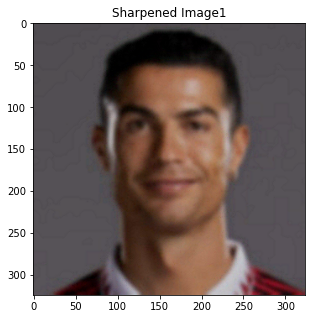

Image score of the following image is 48.00554212790118


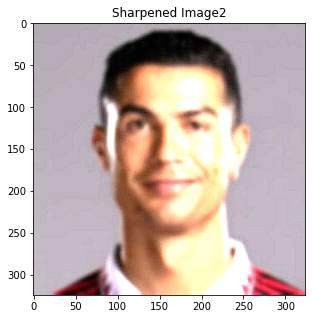

Image score of the following image is 37.22907599134723


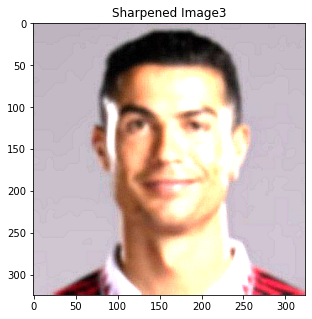

Image score of the following image is 35.65202369227447


In [36]:
blur= cv2.GaussianBlur(image_filtered2,(3,3),0)
image_sharp = cv2.subtract(image_filtered2, blur)
image_sharp1  = cv2.addWeighted(image_filtered2,0.8, image_sharp,-2,0)
image_sharp2  = cv2.addWeighted(image_filtered2,1.8, image_sharp,-2,0)
image_sharp3  = cv2.addWeighted(image_filtered2,1.9, image_sharp,-2,0)
#image_sharp = cv2.cvtColor(image_sharp, cv2.COLOR_GRAY2BGR)

imshow("Sharpened Image1", image_sharp1)
print("Image score of the following image is", score(image_sharp1))
imshow("Sharpened Image2", image_sharp2)
print("Image score of the following image is", score(image_sharp2))
imshow("Sharpened Image3", image_sharp3)
print("Image score of the following image is", score(image_sharp3))

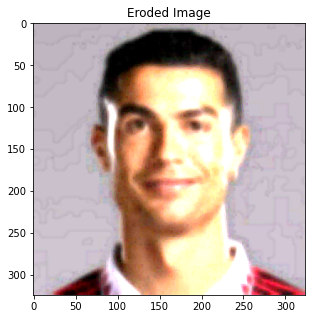

Image score of the following image is 47.547560414289904


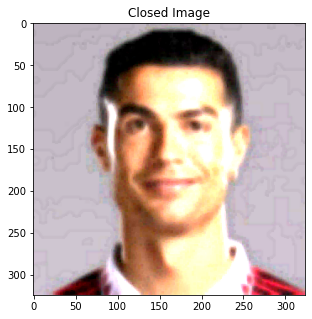

Image score of the following image is 47.547560414289904


In [38]:
kernel =  np.ones((3,3), np.uint8)

image_erode = cv2.erode(image_sharp3, kernel, iterations = 1)
imshow('Eroded Image', image_erode)
print("Image score of the following image is", score(image_erode))

image_closed = cv2.morphologyEx(image_erode, cv2.MORPH_CLOSE, kernel)
imshow('Closed Image',image_closed)
print("Image score of the following image is", score(image_closed))

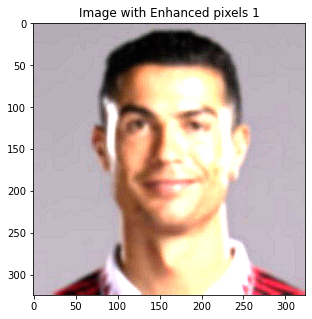

Image score of the following image is 37.28700421654182


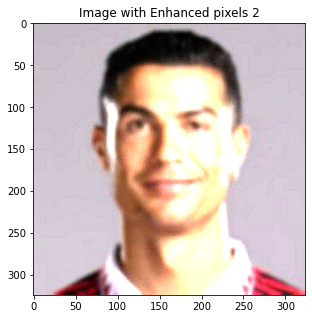

Image score of the following image is 40.720596187697055


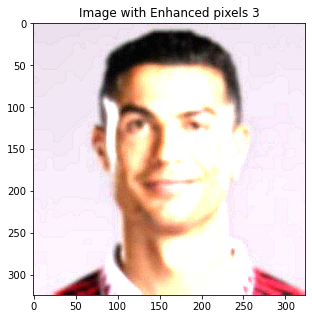

Image score of the following image is 46.804164173710745


In [40]:
alpha1,alpha2,alpha3 = 1.0,1.1,1.3
beta1,beta2,beta3 = 1,1,2
image_enhanced1 = cv2.convertScaleAbs(image_sharp2, alpha = alpha1 , beta = beta1 )
image_enhanced2 = cv2.convertScaleAbs(image_sharp2, alpha = alpha2 , beta = beta2 )
image_enhanced3 = cv2.convertScaleAbs(image_sharp2, alpha = alpha3 , beta = beta3 )
imshow('Image with Enhanced pixels 1', image_enhanced1)
print("Image score of the following image is", score(image_enhanced1))
imshow('Image with Enhanced pixels 2', image_enhanced2)
print("Image score of the following image is", score(image_enhanced2))
imshow('Image with Enhanced pixels 3', image_enhanced3)
print("Image score of the following image is", score(image_enhanced3))

C:\Users\baksh\AppData\Local\Temp\ipykernel_18552\3600663559.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if face == ():
C:\Users\baksh\AppData\Local\Temp\ipykernel_18552\3600663559.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if eyes == ():


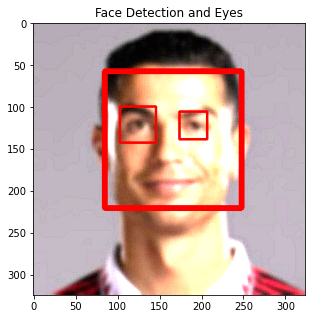

In [41]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

image_to_detect = image_enhanced1
#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
gray = cv2.cvtColor(image_to_detect,cv2.COLOR_BGR2GRAY)


face = face_classifier.detectMultiScale(image_to_detect,1.3,minNeighbors=5,minSize =(5,5)) 

if face == ():
    print("No faces found")

for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_to_detect, 'Face', (x-w, y-h),font,0.5, (0,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(image_to_detect, (x,y), (x+w,y+h),(0,0,255),5)
    roi_gray= gray[y:y+h,x:x+w]
    roi_color=image_to_detect[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.1,minNeighbors =1, minSize = (1,1))
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        if eyes == ():
            print("Eyes Not detected")
    
imshow('Face Detection and Eyes',image_to_detect)

In [42]:
per = (85.36874068841254-37.28700421654182)/85.36874068841254
print(per*100,"% image is enhanced")

56.32241507153574 % image is enhanced
